Motion Tracking in Self-Driving Cars 🚗💡
Motion tracking in self-driving cars enables the system to detect, predict, and track the movement of objects (cars, pedestrians, cyclists, etc.) over time. This is critical for collision avoidance, lane-keeping, and path planning.

1. Motion Tracking Pipeline
Self-driving cars use a combination of sensors and AI models to track motion:

🔹 Step 1: Sensor Fusion
Different sensors work together for robust motion tracking:

LIDAR (Light Detection and Ranging) → 3D object detection.
Radar → Detects velocity and distance.
Cameras → Detects objects and lane markings.
IMU (Inertial Measurement Unit) → Tracks acceleration & rotation.
GPS → Provides global positioning.
🔹 Step 2: Object Detection
Convolutional Neural Networks (CNNs) (e.g., YOLO, Faster R-CNN) detect cars, pedestrians, traffic signs.
LIDAR-based Clustering (DBSCAN, PointNet) segments objects in 3D.
🔹 Step 3: Object Association & Tracking
Once detected, objects are tracked over time using:

Kalman Filters → For tracking objects with Gaussian noise.
Particle Filters → When motion is non-linear.
DeepSORT → Deep Learning-based object tracking.
🔹 Step 4: Motion Prediction
To predict where objects will be in the future, self-driving cars use:

Recurrent Neural Networks (RNNs, LSTMs) → Learn motion patterns.
Bayesian Networks → Probabilistic future predictions.
Multi-Agent Reinforcement Learning → Predicts behavior in traffic.

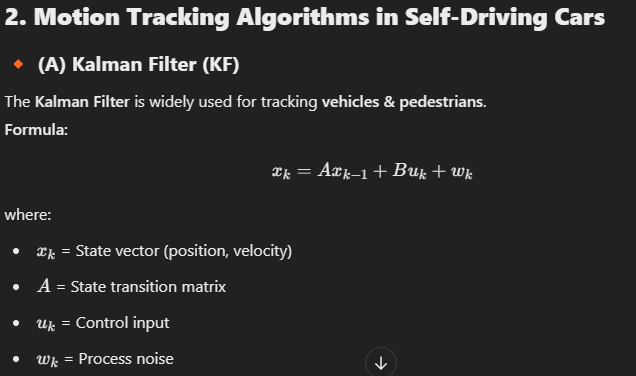

In [ ]:
import numpy as np

class KalmanFilter:
    def __init__(self):
        self.x = np.array([[0], [0]])  # Initial state (position, velocity)
        self.P = np.eye(2)  # Uncertainty covariance
        self.A = np.array([[1, 1], [0, 1]])  # State transition
        self.H = np.array([[1, 0]])  # Measurement function
        self.Q = np.eye(2) * 0.01  # Process noise
        self.R = np.array([[0.1]])  # Measurement noise

    def predict(self):
        self.x = np.dot(self.A, self.x)
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q

    def update(self, measurement):
        y = measurement - np.dot(self.H, self.x)
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        self.P = self.P - np.dot(K, np.dot(self.H, self.P))

kf = KalmanFilter()
measurements = [1, 2, 3, 4, 5]  # Example car positions
for z in measurements:
    kf.predict()
    kf.update(np.array([[z]]))
    print(f"Estimated Position: {kf.x[0,0]:.2f}, Velocity: {kf.x[1,0]:.2f}")


(B) DeepSORT (Deep Learning + Kalman Filter)
DeepSORT (Deep Simple Online and Realtime Tracker) combines:

Kalman Filter → Tracks motion.
CNN-based ReID (Re-Identification) → Ensures identity persistence.
🔹 Code Example (Using OpenCV & DeepSORT)

python
Copy
Edit


In [ ]:
from deep_sort_realtime.deepsort_tracker import DeepSort

tracker = DeepSort(max_age=30, n_init=3, nms_max_overlap=1.0)

# Example detections (x, y, width, height, confidence, class_id)
detections = [[50, 60, 200, 400, 0.9, 2], [300, 500, 150, 300, 0.85, 2]]
tracks = tracker.update_tracks(detections, frame=1)

for track in tracks:
    print(f"Track ID {track.track_id}, Position: {track.to_tlbr()}")


(C) Long Short-Term Memory (LSTM) for Future Motion Prediction
LSTMs predict future trajectories based on past data.

In [ ]:
import torch
import torch.nn as nn

class MotionPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=64, output_size=2):
        super(MotionPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])

model = MotionPredictor()
input_seq = torch.tensor([[[1.0, 2.0], [2.0, 3.0], [3.0, 4.0]]])  # Past positions
pred = model(input_seq)
print("Predicted Future Position:", pred.detach().numpy())


Real-World Example: Tesla’s Motion Tracking
Tesla uses a multi-sensor fusion approach:

Vision-based CNNs (e.g., YOLO, EfficientNet) for object detection.
Radar for velocity estimation.
Kalman Filters for motion tracking.
Transformer-based models (Occupancy Networks) for future path prediction.

4. Future of Motion Tracking in Self-Driving Cars
🔹 Graph Neural Networks (GNNs) → For traffic-aware motion prediction.
🔹 Transformers (e.g., TrajectoryBERT) → For better sequential modeling.
🔹 Neural Radiance Fields (NeRFs) → For high-fidelity 3D tracking.

Graph Neural Networks (GNNs) for Motion Tracking in Self-Driving Cars 🚗
Graph Neural Networks (GNNs) are deep learning models designed to operate on graph-structured data. In self-driving cars, GNNs help model interactions between objects (vehicles, pedestrians, cyclists, lanes, etc.), improving motion tracking and trajectory prediction.

1. Why Use GNNs for Motion Tracking?
🚀 Traditional methods (Kalman Filters, LSTMs, CNNs) have limitations:

CNNs don’t model object interactions explicitly.
LSTMs process sequences but ignore spatial dependencies.
Kalman Filters assume linear motion.
🧠 GNNs overcome these challenges by:

Modeling complex spatial-temporal relationships.
Capturing interactions between multiple agents (cars, pedestrians).
Learning traffic flow dynamics in intersections and highways.

2. Graph Representation in Motion Tracking
A self-driving car scene can be represented as a graph:

Nodes: Vehicles, pedestrians, lane markings, obstacles.
Edges: Relationships between objects (distance, speed correlation).

        🚗 Car1 ←→ 🚗 Car2  (Edge: Distance, Velocity Relation)
        ↓  
   🚶 Pedestrian (Edge: Potential Collision)


3. Graph Neural Networks for Motion Tracking
Graph-Based Motion Prediction Model
Input: Past motion history (position, velocity, acceleration).
Graph Construction: Nodes = objects, Edges = object interactions.
GNN Propagation: Message passing updates node states.
Output: Future trajectory prediction.

Key GNN Variants for Motion Tracking

GNN Type	Use Case

Graph Convolutional Networks (GCN)	Learning spatial dependencies

Graph Attention Networks (GAT)	Prioritizing important interactions

Temporal Graph Networks (TGN)	Handling dynamic motion over time

Neural Relational Graphs (NRG)	Modeling heterogeneous agents (cars, pedestrians, roads)

Define GNN Model

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

class MotionGNN(torch.nn.Module):
    def __init__(self):
        super(MotionGNN, self).__init__()
        self.conv1 = GCNConv(4, 16)  # Input: (x, y, vx, vy)
        self.conv2 = GCNConv(16, 32)
        self.conv3 = GCNConv(32, 2)  # Output: (future x, future y)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x


Create Graph Data (Vehicles & Edges)

In [ ]:
# Node features: [x, y, vx, vy] for each object (car, pedestrian)
node_features = torch.tensor([[10, 5, 2, 1],  # Car1
                              [12, 7, 1, 2],  # Car2
                              [8,  4, 0, 0]], # Pedestrian
                             dtype=torch.float)

# Edges (connections between nodes)
edge_index = torch.tensor([[0, 1, 1, 2],  # From nodes
                           [1, 0, 2, 1]], # To nodes
                          dtype=torch.long)

# Create graph data
graph_data = Data(x=node_features, edge_index=edge_index)


Train GNN for Motion Prediction

In [ ]:
model = MotionGNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    optimizer.zero_grad()
    future_positions = model(graph_data.x, graph_data.edge_index)
    loss = F.mse_loss(future_positions, torch.tensor([[11, 6], [13, 8], [8, 4]], dtype=torch.float))  # Ground truth
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
